In [5]:
import numpy as np
from tqdm import tqdm

import matplotlib   # Needed for font size spec, color map transformation function bla bla
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)
plt.rcParams['figure.figsize'] = (12.0, 10.0) # resize plots

from multihist import Hist1d, Histdd

In [6]:
# Create histograms just like from numpy...
m = Hist1d([0, 3, 1, 6, 2, 9], bins=3)

# ...or add data incrementally:
m = Hist1d(bins=100, range=(-3, 4))
m.add(np.random.normal(0, 0.5, 10**4))
m.add(np.random.normal(2, 0.2, 10**3))

# Get the data back out:
print(m.histogram, m.bin_edges)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   1
   2   4   6   5   9  14  19  28  40  60  51  95 117 145 191 228 267 357
 443 432 476 510 583 545 542 542 529 537 445 454 408 323 319 277 231 173
 147 114  77  77  58  41  16  14  15  14  12  15  50  50  80 116 119 138
 128 114  85  54  32  13  10   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0] [-3.   -2.93 -2.86 -2.79 -2.72 -2.65 -2.58 -2.51 -2.44 -2.37 -2.3  -2.23
 -2.16 -2.09 -2.02 -1.95 -1.88 -1.81 -1.74 -1.67 -1.6  -1.53 -1.46 -1.39
 -1.32 -1.25 -1.18 -1.11 -1.04 -0.97 -0.9  -0.83 -0.76 -0.69 -0.62 -0.55
 -0.48 -0.41 -0.34 -0.27 -0.2  -0.13 -0.06  0.01  0.08  0.15  0.22  0.29
  0.36  0.43  0.5   0.57  0.64  0.71  0.78  0.85  0.92  0.99  1.06  1.13
  1.2   1.27  1.34  1.41  1.48  1.55  1.62  1.69  1.76  1.83  1.9   1.97
  2.04  2.11  2.18  2.25  2.32  2.39  2.46  2.53  2.6   2.67  2.74  2.81
  2.88  2.95  3.02  3.09  3.16  3.23  3.3   3.37  3.44  3.51  3.58  3.65
  3.72  3

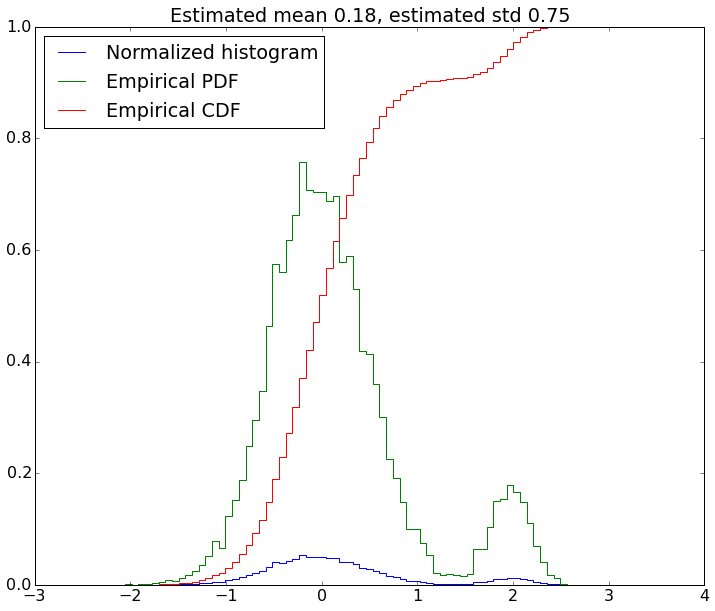

In [8]:
# Access derived quantities like bin_centers, normalized_histogram, density, cumulative_density, mean, std
plt.plot(m.bin_centers, m.normalized_histogram, label="Normalized histogram", linestyle='steps')
plt.plot(m.bin_centers, m.density, label="Empirical PDF", linestyle='steps')
plt.plot(m.bin_centers, m.cumulative_density, label="Empirical CDF", linestyle='steps')
plt.title("Estimated mean %0.2f, estimated std %0.2f" % (m.mean, m.std))
plt.legend(loc='best')
plt.show()

In [9]:
# Slicing and arithmetic behave just like ordinary ndarrays
print("The fourth bin has %d entries" % m[3])
m[1:4] += 4 + 2 * m[-27:-24]
print("Now it has %d entries" % m[3])

The fourth bin has 0 entries
Now it has 112 entries


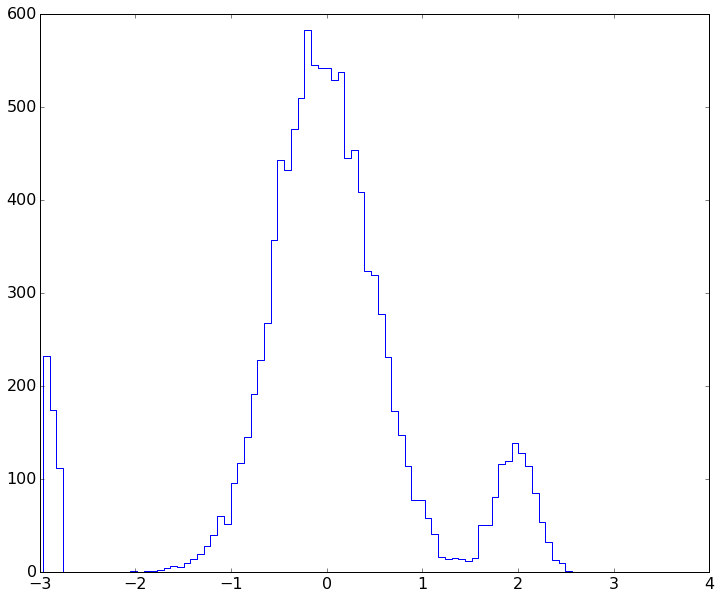

In [10]:
# Of course I couldn't resist adding a canned plotting function:
m.plot()
plt.show()

# 2d Histogram

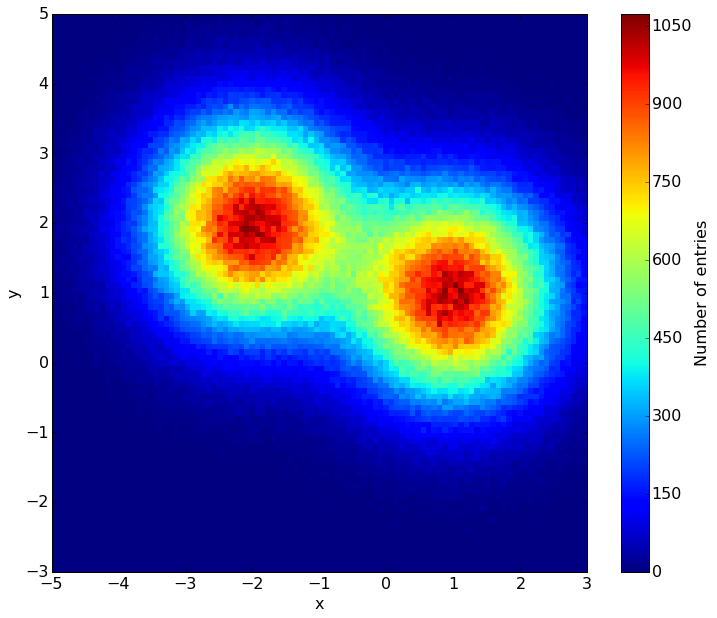

In [11]:
# Create and show a 2d histogram. Axis names are optional.
m2 = Histdd(bins=100, range=[[-5, 3], [-3, 5]], axis_names=['x', 'y'])
m2.add(np.random.normal(1, 1, 10**6), np.random.normal(1, 1, 10**6))
m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
m2.plot()
plt.show()

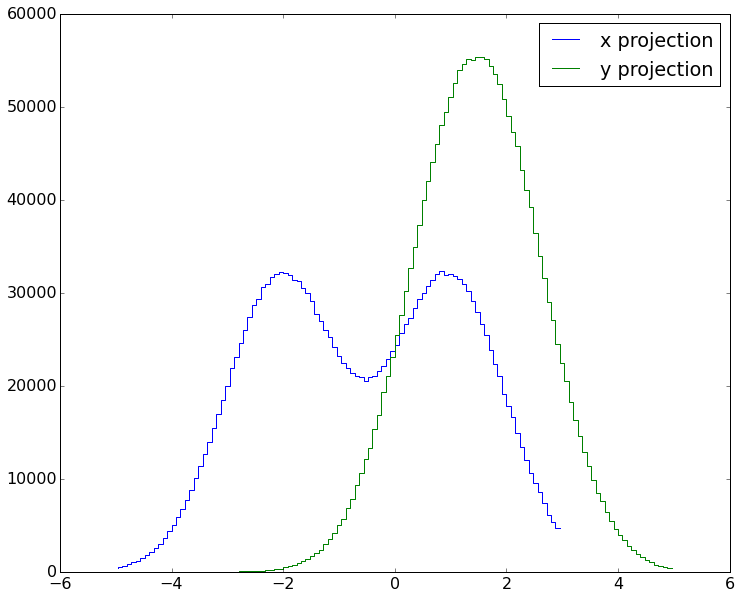

In [12]:
# x and y projections return Hist1d objects
m2.projection('x').plot(label='x projection')
m2.projection(1).plot(label='y projection')
plt.legend()
plt.show()

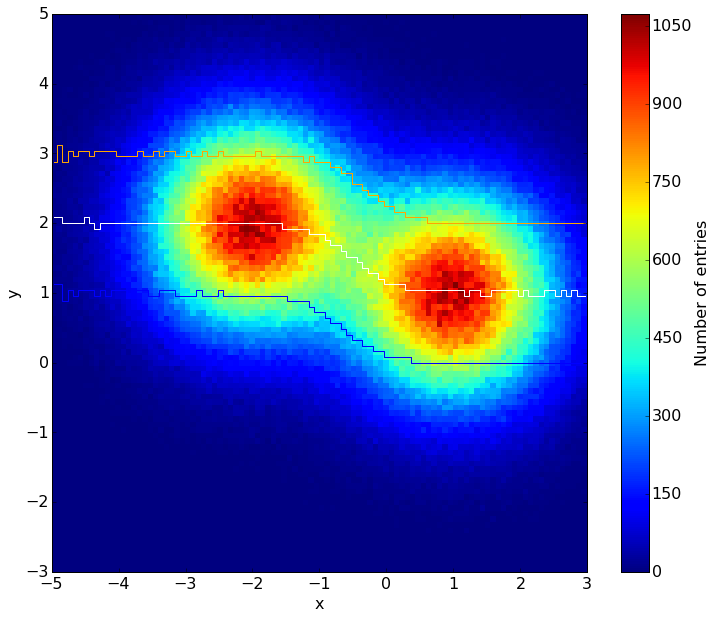

In [35]:
from scipy.stats import norm

# Demonstrate percentiles
m2.plot()

median = m2.percentile(50, 'y')
plt.plot(median.bin_centers, median, color='white', linestyle='steps-mid')

sigma_high = m2.percentile(100 * norm.cdf(1), 'y')
plt.plot(sigma_high.bin_centers, sigma_high, color='orange', linestyle='steps-mid')

sigma_low = m2.percentile(100 * norm.cdf(-1), 'y')
plt.plot(sigma_low.bin_centers, sigma_low, color='blue', linestyle='steps-mid')

plt.show()

In [36]:
sigma_low.bin_centers

array([-4.96, -4.88, -4.8 , -4.72, -4.64, -4.56, -4.48, -4.4 , -4.32,
       -4.24, -4.16, -4.08, -4.  , -3.92, -3.84, -3.76, -3.68, -3.6 ,
       -3.52, -3.44, -3.36, -3.28, -3.2 , -3.12, -3.04, -2.96, -2.88,
       -2.8 , -2.72, -2.64, -2.56, -2.48, -2.4 , -2.32, -2.24, -2.16,
       -2.08, -2.  , -1.92, -1.84, -1.76, -1.68, -1.6 , -1.52, -1.44,
       -1.36, -1.28, -1.2 , -1.12, -1.04, -0.96, -0.88, -0.8 , -0.72,
       -0.64, -0.56, -0.48, -0.4 , -0.32, -0.24, -0.16, -0.08,  0.  ,
        0.08,  0.16,  0.24,  0.32,  0.4 ,  0.48,  0.56,  0.64,  0.72,
        0.8 ,  0.88,  0.96,  1.04,  1.12,  1.2 ,  1.28,  1.36,  1.44,
        1.52,  1.6 ,  1.68,  1.76,  1.84,  1.92,  2.  ,  2.08,  2.16,
        2.24,  2.32,  2.4 ,  2.48,  2.56,  2.64,  2.72,  2.8 ,  2.88,  2.96])

In [37]:
sigma_low.histogram

array([ 1.12,  1.12,  0.88,  1.04,  0.96,  1.04,  1.04,  1.04,  0.96,
        1.04,  0.96,  1.04,  1.04,  1.04,  0.96,  1.04,  1.04,  1.04,
        0.96,  0.96,  1.04,  1.04,  1.04,  0.96,  0.96,  0.96,  0.96,
        1.04,  0.96,  0.96,  0.96,  1.04,  0.96,  0.96,  0.96,  0.96,
        0.96,  0.96,  0.96,  0.96,  0.96,  0.96,  0.96,  0.96,  0.88,
        0.88,  0.88,  0.88,  0.8 ,  0.72,  0.72,  0.64,  0.56,  0.56,
        0.48,  0.4 ,  0.32,  0.32,  0.24,  0.24,  0.16,  0.16,  0.08,
        0.08,  0.08,  0.08,  0.08,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])